In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Data generation

In [2]:
observations = 1000
xs = np.random.uniform(-10,10, (observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_Intro', inputs=generated_inputs, targets=generated_targets)

# Solving with TensorFlow

In [5]:
training_data = np.load('TF_Intro.npz')


In [27]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(output_size, 
                          #kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),
                          #bias_initializer=tf.random_uniform_initializer(-0.1,0.1)
                         )
])

#custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 29.1252
Epoch 2/100
32/32 - 0s - loss: 4.4842
Epoch 3/100
32/32 - 0s - loss: 1.4900
Epoch 4/100
32/32 - 0s - loss: 0.6777
Epoch 5/100
32/32 - 0s - loss: 0.4286
Epoch 6/100
32/32 - 0s - loss: 0.3703
Epoch 7/100
32/32 - 0s - loss: 0.3533
Epoch 8/100
32/32 - 0s - loss: 0.3507
Epoch 9/100
32/32 - 0s - loss: 0.3525
Epoch 10/100
32/32 - 0s - loss: 0.3461
Epoch 11/100
32/32 - 0s - loss: 0.3521
Epoch 12/100
32/32 - 0s - loss: 0.3463
Epoch 13/100
32/32 - 0s - loss: 0.3461
Epoch 14/100
32/32 - 0s - loss: 0.3585
Epoch 15/100
32/32 - 0s - loss: 0.3485
Epoch 16/100
32/32 - 0s - loss: 0.3464
Epoch 17/100
32/32 - 0s - loss: 0.3587
Epoch 18/100
32/32 - 0s - loss: 0.3510
Epoch 19/100
32/32 - 0s - loss: 0.3489
Epoch 20/100
32/32 - 0s - loss: 0.3497
Epoch 21/100
32/32 - 0s - loss: 0.3491
Epoch 22/100
32/32 - 0s - loss: 0.3493
Epoch 23/100
32/32 - 0s - loss: 0.3494
Epoch 24/100
32/32 - 0s - loss: 0.3531
Epoch 25/100
32/32 - 0s - loss: 0.3540
Epoch 26/100
32/32 - 0s - loss: 0

## Extracting the weights and biases

In [28]:
model.layers[0].get_weights()

[array([[ 2.0129972],
        [-3.0016308]], dtype=float32),
 array([5.0115285], dtype=float32)]

In [29]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0129972],
       [-3.0016308]], dtype=float32)

In [30]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0115285], dtype=float32)

## Extract the outputs (make predictions)

In [31]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 27.2],
       [  0.3],
       [  5.9],
       [-19.2],
       [ -6. ],
       [-26.8],
       [-14.3],
       [ -2.9],
       [ -8.8],
       [  8.6],
       [ 12.1],
       [ -3.4],
       [  7.1],
       [  8.5],
       [ 16.1],
       [ -4.1],
       [  4.7],
       [ 26.6],
       [-18.4],
       [-40.5],
       [ 13.9],
       [-32.1],
       [-14. ],
       [ 37.4],
       [-38. ],
       [ 24.4],
       [ 15. ],
       [-19. ],
       [ 14.4],
       [  8.8],
       [  3. ],
       [ 13.9],
       [ 19.3],
       [-17.4],
       [-23.2],
       [-10.1],
       [-28. ],
       [ -6.4],
       [-24.3],
       [-14.6],
       [-37.6],
       [  8.5],
       [ 37.5],
       [ 48.7],
       [ 33.7],
       [-18.7],
       [-27. ],
       [  1. ],
       [ -6.9],
       [  0.2],
       [ -4.9],
       [ 13.8],
       [ -6.1],
       [  0.8],
       [ 10.8],
       [ -5.4],
       [ 23.3],
       [-33.2],
       [-14.8],
       [ 53.8],
       [ 30.9],
       [ 47.3],
       [

In [32]:
training_data['targets'].round(1)

array([[ 27.5],
       [  1.1],
       [  6. ],
       [-18.9],
       [ -5.2],
       [-26. ],
       [-15.2],
       [ -3.8],
       [ -7.7],
       [  8. ],
       [ 12.8],
       [ -2.6],
       [  7.6],
       [  8.5],
       [ 17.1],
       [ -3.9],
       [  4. ],
       [ 25.6],
       [-17.7],
       [-39.9],
       [ 12.9],
       [-31.5],
       [-14.2],
       [ 37.1],
       [-38.4],
       [ 23.9],
       [ 14.5],
       [-18.1],
       [ 13.8],
       [  7.9],
       [  3.5],
       [ 13.7],
       [ 20.1],
       [-18.2],
       [-22.7],
       [-10.9],
       [-27.7],
       [ -5.7],
       [-25.2],
       [-15.1],
       [-37.5],
       [  8.2],
       [ 37.4],
       [ 48.3],
       [ 33.5],
       [-19.1],
       [-27.2],
       [  0.4],
       [ -6.4],
       [ -0. ],
       [ -5.5],
       [ 12.7],
       [ -6.7],
       [  0. ],
       [  9.7],
       [ -6.5],
       [ 23.4],
       [-33.9],
       [-14.6],
       [ 53.9],
       [ 31. ],
       [ 48.1],
       [

# Plotting data

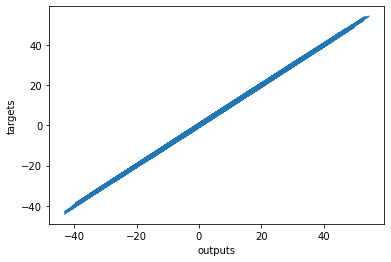

In [33]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()